# Введение в аналитику данных: домашнее задание 2

В этом домашнем задании мы будем проверять гипотезы. Во всех задачах подробно обосновывайте выбор критерия для проверки гипотезы и делайте выводы (можно пользоваться учебниками и генеративными моделями - но пропускайте подсказки ассистентов через голову).

У вас будет 4 задания - каждое весит 2.5 балла из 10, суммарно за домашнее задание можно набрать 10 баллов.

Оцениваются:

* корректность полученных результатов
* подробность обоснования выбора статистических тестов и выводы

Ответы записывайте внутри вашего рабочего google colab, а также (подробно текстом) дублируйте [в форму](https://docs.google.com/forms/d/e/1FAIpQLSfddNy4g88YHPA4fux1TLYaweFf4SWPiU0loeuwCYID7eiW4w/viewform?usp=sf_link).

In [ ]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

## Задание 1 (рейтинги президентов)

В таблице `presidents.csv` представлены рейтинги различных президентов США (интересно, почему не российских). Социальные опросы проводились раз в квартал. Опрашивалась случайная выборка граждан. У каждого спрашивалось одобряет ли он деятельность президента.

Ричард Никсон был президентом США с 20 января 1969 года по 9 августа 1974 года. 17 июня 1972 года произошёл Уотергейтский скандал. Давайте проанализируем, что при этом произошло с его рейтингом.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/presidents.csv')
df.head()

,year,Qtr1,Qtr2,Qtr3,Qtr4
0,1945,NaN,87,82.0,75.0
1,1946,63.0,50,43.0,32.0
2,1947,35.0,60,54.0,55.0
3,1948,36.0,39,NaN,NaN
4,1949,69.0,57,57.0,51.0


Чтобы привести таблицу к удобному виду используйте функцию `pd.melt`. Вытащите из таблички рейтинг Никсона с 1 квартала 1969 года по 2 квартал 1972 года (включая его). Запишите эти данные в переменную `x`. Рейтинг с 3 квартала 1972 года по 2 квартал 1974 года поместите в переменную `y`. Пропуски в данных удалите из выборки.

In [ ]:
melted_df = pd.melt(df, id_vars=['year'], var_name='Quarter', value_name='Ratings')

mapping = {'Qtr1': 1, 'Qtr2': 2, 'Qtr3': 3, 'Qtr4': 4}
melted_df['Quarter_num'] = melted_df['Quarter'].map(mapping)

melted_df = melted_df.sort_values(by=['year', 'Quarter'])
melted_df = melted_df.reset_index(drop=True)


In [ ]:
#рейтинг до конфликта
x = melted_df[
    ((melted_df['year'] == 1969) & (melted_df['Quarter_num'] >= 1)) |
    ((melted_df['year'] == 1972) & (melted_df['Quarter_num'] <= 2)) |
    ((melted_df['year'] == 1970)) | ((melted_df['year'] == 1971))

]

x = x.dropna(subset=['Ratings'])
x = x.drop(columns=['Quarter'])
x = x.reset_index(drop=True)

x

,year,Ratings,Quarter_num
0,1969,59.0,1
1,1969,65.0,2
2,1969,65.0,3
3,1969,56.0,4
4,1970,66.0,1
5,1970,53.0,2
6,1970,61.0,3
7,1970,52.0,4
8,1971,51.0,1
9,1971,48.0,2


In [ ]:
# рейтинг после конфликта
y = melted_df[

    ((melted_df['year'] == 1972) & (melted_df['Quarter_num'] >= 3)) |
    ((melted_df['year'] == 1974) & (melted_df['Quarter_num'] <= 2)) |
    ((melted_df['year'] == 1973))

]
y = y.drop(columns=['Quarter'])
y = y.dropna(subset=['Ratings'])
y = y.reset_index(drop=True)

y

,year,Ratings,Quarter_num
0,1973,68.0,1
1,1973,44.0,2
2,1973,40.0,3
3,1973,27.0,4
4,1974,28.0,1
5,1974,25.0,2


Правда ли, что после скандала средний рейтинг Никсона рухнул? Предполагайте, что рейтинг распределён нормально, а также, что дисперсия рейтинга не изменилась из-за скандала. Наблюдаемое значение статистики запишите в переменную `obs`, в переменную `pval` запишите $p$-значение.

**Нулевая гипотеза**: рейтинг Никсона до и после скандала не изменился

**Альтернативная гипотеза**: после скандала рейтинг Никсона рухнул

In [ ]:
sample1 = x['Ratings']
sample2 = y['Ratings']

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

# Выполняем тест Стьюдента
obs, pval = ttest_ind(sample1, sample2)

# Выводим результаты
print("Значение t-статистики:", obs)
print("p-значение:", pval)

if pval < 0.05:
    print("Различие между выборками статистически значимо")
else:
    print("Различие между выборками не является статистически значимым")

Значение t-статистики: 3.5640741313229793
p-значение: 0.002217468969284891
Различие между выборками статистически значимо


In [ ]:
# небольшая самопроверка
assert np.abs(obs - 3.5640741313229793) < 1e-5

**Почему вы выбрали именно этот критерий для проверки гипотезы? Какие выводы вы
сделали?**




**Ответ:**
По условию данные имеют нормальное распределение, дисперсия не изменилась, а выборка данных мала. Поэтому нам подойдет тест Стьюдента. Значение p-value мало, а потому различие между выборками статистически значимо, и нулевая гипотеза *отвергается*. Значит, альтернативная гипотеза, наоборот, *подтверждается*, то есть рейтинг Никсона рухнул после скандала

**Отсюда мы делаем вывод, что рейтинг Никсона действительно рухнул после скандала**


Снова президентом Никсон станет в $3000$ году.

![](https://vignette.wikia.nocookie.net/futurama/images/2/2f/Richard_M._Nixon%27s_head.jpg/revision/latest/scale-to-width-down/250?cb=20131123190522&path-prefix=ru)

## Задание 2 (доктор сон)

Проводится эксперимент о пользе нового снотворного. Для его проведения используется группа из $10$ студентов. В первый день каждый из них ложится спать. На утро измеряется, сколько он проспал. Из результата вычитают $8$ (нормальное число часов сна). На второй день каждому дают таблетку. Утром снова измеряют, сколько человек проспал, и вычитают $8$. Результаты эксперимента записаны в табличку `sleep.csv`.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/sleep.csv')
df

,extra,group,ID
0,0.7,1,1
1,-1.6,1,2
2,-0.2,1,3
3,-1.2,1,4
4,-0.1,1,5
5,3.4,1,6
6,3.7,1,7
7,0.8,1,8
8,0.0,1,9
9,2.0,1,10


array([[<Axes: title={'center': 'extra'}>]], dtype=object)

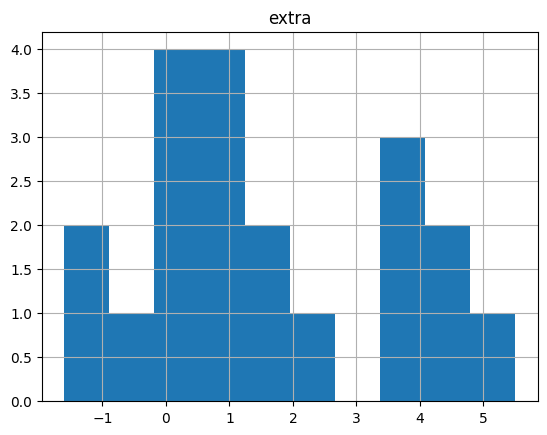

In [ ]:
#проверим распределение данных
df.hist('extra')

**Распределение данных похоже на нормальное**, значит в качестве статистического теста нам подойдет тест Стьюдента



Правда ли, что сон студентов до приёма снотворного не отличается от нормы (отклонение от 8 часов равно нулю). Проверьте эту гипотезу на $5\%$ уровне значимости, в переменную `pval1` запишите p-значение.

**Нулевая гипотеза:** сон студентов до приёма снотворного не отличается от нормы


In [ ]:
from scipy import stats

before = df[df['group'] == 1]['extra']

tobs1, pval1 = stats.ttest_1samp(before, 0)

print(tobs1)
print(pval1)

if pval1 < 0.05:
    print("Различие между выборками статистически значимо")
else:
    print("Различие между выборками не является статистически значимым")

1.3257101407138212
0.2175977800684489
Различие между выборками не является статистически значимым


**Небольшой вывод 1:**  нулевая гипотеза *не отвергается*, а значит, мы можем считать, что до приема снотворного в среднем сон студентов от нормы не отличается

Правда ли, что благодаря таблеткам студенты стали спать больше (односторонняя альтернатива)? Запишите в переменную `pval2` соотвествующее p-значение.

**Нулевая гипотеза:** продолжительность сна студентов и прием таблеток не связаны

**Альтернативная гипотеза:** прием таблеток напрямую влияет на продолжительность сна студентов

In [ ]:
from scipy.stats import ttest_rel

before = df[df['group'] == 1]['extra']
after = df[df['group'] == 2]['extra']

# Проведение парного t-теста
tobs2, pval2 = ttest_rel(after, before, alternative='greater')
print(tobs2)
print(pval2)

if pval2 < 0.05:
    print("Различие между выборками статистически значимо")
else:
    print("Различие между выборками не является статистически значимым")

4.062127683382037
0.001416445098692135
Различие между выборками статистически значимо


In [ ]:
if tobs1 < tobs2:
  print("студенты стали спать больше")

elif tobs1 == tobs2:
  print("продолжительность сна студентов не изменилась")

else:
  print("студенты стали спать меньше")

студенты стали спать больше


**Небольшой вывод 2:**  в силу того, что Различие между выборками статистически значимо, мы отвергаем нулевую гипотезу и принимаем альтернативную. В силу того, что tobs2 > tobs1 мы можем судить, что при приеме препарата продолжительность сна студентов увеличилась

In [ ]:
# самопроверка
assert np.abs(tobs1 - 1.325710) < 1e-5
assert np.abs(tobs2 - 4.062127) < 1e-5

**Почему вы выбрали именно этот критерий для проверки гипотезы? Какие выводы вы сделали?**

**Ответ (продублируйте в гугл-форму):**

Выборка дана небольшая (только 10 студентов), однако было важно понять, как распределены данные для корректного выбора статистического теста. Построив гистограмму, я выяснила, что данные распределены нормально, а значит, нам подойдет тест Стьюдента в обоих случаях. При работе с результатами до приема препарата я выяснила, что статистических различий нет, а потому можно считать, что сон студентов до приёма снотворного не отличается от нормы. Во втором же тесте я сравнила длительность сна до приема лекарства и после. В силу значимого статистического различия между выборками, нулевая гипотеза была отвергнута, а значит, была обнаружена взаимосвязь между продолжительностью сна студентов и приемом ими лекарства. Сравнив tobs1 и tobs2, я выяснила, что продолжительность сна возросла.

## Задание 3 (мыши и зеркало)

$16$ лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

![](https://ars.els-cdn.com/content/image/1-s2.0-S0168159104000061-gr1.gif)

В файле `mouses_mirror.txt` лежит информация о том, какую долю времени мышка проводила в клетке с зеркалом.

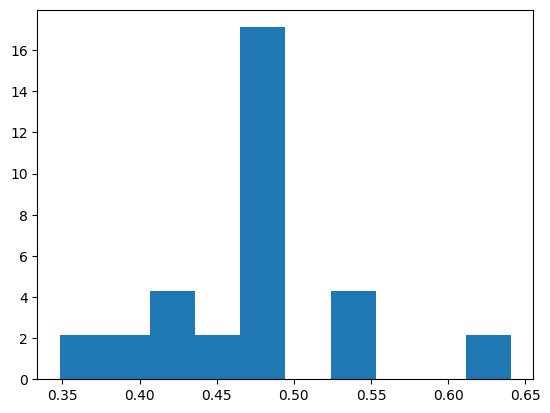

In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/mouses_mirror.txt', header = None)[0].values
plt.hist(x, density=True);

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью критерия знаков. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия. Запишите в переменную `pvalue_1` получившееся в результате этого $p$-значение.

**Нулевая гипотеза:** мышкам безразлично в какой комнате проводить время, т.е в обеих комнатах они проводят примерно одинаковое время

In [ ]:
from scipy.stats import binomtest

positive = np.sum(x > 0.5)
negative = np.sum(x < 0.5)

n = positive + negative

pvalue_1 = binomtest(positive, n, p=0.5).pvalue

print(pvalue_1)

alpha = 0.05


if pvalue_1 < 0.05:
    print("Различие между выборками статистически значимо")
    print("Отвергаем нулевую гипотезу: мышкам не безразлично, в какой комнате проводить время.")
else:
    print("Различие между выборками не является статистически значимым")
    print("Нет оснований отвергать нулевую гипотезу: мышкам безразлично, в какой комнате проводить время.")


0.021270751953125
Различие между выборками статистически значимо
Отвергаем нулевую гипотезу: мышкам не безразлично, в какой комнате проводить время.


Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью теста Вилкоксона. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_2` получившееся в результате этого $p$-значение.

**Нулевая гипотеза:** мышкам безразлично в какой комнате проводить время, т.е в обеих комнатах они проводят примерно одинаковое время

In [ ]:
from scipy.stats import wilcoxon

x_corrected = x - 0.5

t_stat, pvalue_2 = wilcoxon(x_corrected)

print(pvalue_2)

alpha = 0.05
if pvalue_2 < 0.05:
  print("Различие между выборками статистически значимо")
  print("Отвергаем нулевую гипотезу: мышкам не безразлично, в какой комнате проводить время.")
else:
  print("Различие между выборками не является статистически значимым")
  print("Нет оснований отвергать нулевую гипотезу: мышкам безразлично, в какой комнате проводить время.")

0.09344482421875
Различие между выборками не является статистически значимым
Нет оснований отвергать нулевую гипотезу: мышкам безразлично, в какой комнате проводить время.


Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью асимптотического $z$-теста. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_3` получившееся в результате этого $p$-значение.

**Нулевая гипотеза:** мышкам безразлично в какой комнате проводить время, т.е в обеих комнатах они проводят примерно одинаковое время

In [ ]:
from statsmodels.stats.weightstats import ztest

z_stat, pvalue_3 = ztest(x, value=0.5)

print(pvalue_3)

alpha = 0.05
if pvalue_3 < 0.05:
    print("Различие между выборками статистически значимо")
    print("Отвергаем нулевую гипотезу: мышкам не безразлично, в какой комнате проводить время.")
else:
    print("Различие между выборками не является статистически значимым")
    print("Нет оснований отвергать нулевую гипотезу: мышкам безразлично, в какой комнате проводить время.")


0.13460721078205806
Различие между выборками не является статистически значимым
Нет оснований отвергать нулевую гипотезу: мышкам безразлично, в какой комнате проводить время.


In [ ]:
# проверка того, что задание решено верно
assert pvalue_1 < 0.05
assert pvalue_2 > 0.05
assert pvalue_3 > 0.05

Объясните, почему `pvalue` от теста к тесту ведёт себя именно так. Подробнее про опыт с мышками читайте [в оригинальном исследовании.](https://www.sciencedirect.com/science/article/abs/pii/S0168159104000061)

__Ответ (продублируйте в гугл-форму):__

Поведение p-value может различаться от используемого теста, поскольку у каждого из них есть свои особенности - да и не все тесты являются нподходящими. Sign-тест является непараметрическим, не требует нормального распределения даннных и работает с медианой выборки. Его удобно использовать для маленьких выборок. Аналогично тест Вилкоксона является непараметрическим, работает на маленьких выборках и не требует нормального распределения данных. Однако среди этих двух тестов наиболее правильным является Sign-тест, поскольку он работает с медианой распределения времени, а нам именно это и нужно (ведь мы хотим проверить, одинаковое ли время в среднем мышки проводят в разных комнатах). Тест Вилкоксона чувствителен к симметрии распределения данных. Из гистограммы выше мы видим, что такой симметрии нет, а из-за этого тест Вилкоксона может давать неправильный результат (что, кстати становится видно после прочтения оригинального исследования, ведь согласно ему мышкам действительно небезразлично, в какой комнате находиться - зеркало большинству мышек не понравилось, а тест Вилкоксона это не подтверждает).


Z-тест является параметрическим и применяется на больших выборках (поэтому по-хорошему, он тут уже не показателен, так как у нас всего 16 мышей). Также Z-тест требует нормального распределения данных, чего нет в данном случае. Из-за этого данный тест также выдает некорректный статистический результат

## Задание 4 (транзакции клиентов)

Для увеличения конверсии мы хотим переименовать кнопку "Subscribe now!" на сайте в "Keep me updated".

Данные о результатах A/B-теста находятся в таблице `a_b_test`. В колонке `transaction` для каждого клиента указано, кликнул он по кнопке или нет.

Оцените эффект от изменения названия кнопки.



In [ ]:
a_b_test = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/ClientsTransactions.csv")

a_b_test.head()

,group,transaction
0,B,0
1,B,0
2,A,0
3,B,0
4,A,0


Создайте summary_table. Код должен иметь структуру (названия колонок, строк и их количество) как на таблице со скриншота.

,group,transaction,conversion_rate
group,,,
A,2060,56,0.027184
B,2338,74,0.031651


In [ ]:
summary_table = a_b_test.groupby('group')['transaction'].agg(['count', 'sum']).reset_index()
summary_table.columns = ['group', 'group ', 'transaction']
summary_table['conversion_rate'] = summary_table['transaction'] / summary_table['group ']
summary_table.set_index('group', inplace=True)

summary_table

,group,transaction,conversion_rate
group,,,
A,2060,56,0.027184
B,2338,74,0.031651


Отфильтруйте исходную таблицу, оставив в ней только клиентов группы А - результат назовите A_group. Создайте аналогичный объект B_group по группе B.

Нарисуйте гистограмму, отображающую на одном рисунке количество успешных транзакций (кликов по кнопке) для каждой группы.

In [ ]:
A_group = a_b_test[a_b_test['group'] == 'A']
B_group = a_b_test[a_b_test['group'] == 'B']

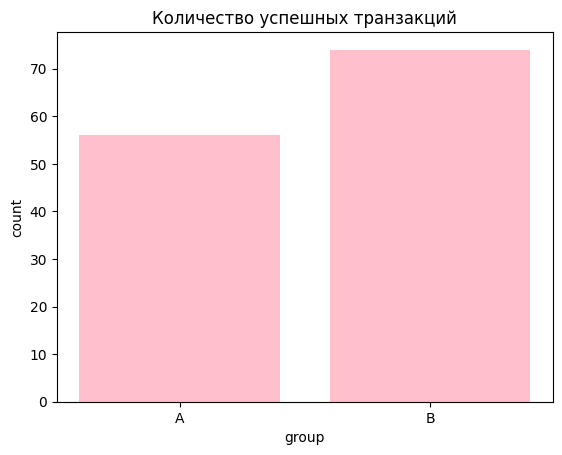

In [ ]:
A_transactions = A_group[A_group['transaction'] == 1]
B_transactions = B_group[B_group['transaction'] == 1]

plt.bar(['A', 'B'], [len(A_transactions), len(B_transactions)], color = 'pink')
plt.xlabel('group')
plt.ylabel('count')
plt.title('Количество успешных транзакций')
plt.show()


**Небольшой вывод:** на первый взгляд кажется, что после изменения кнопки число кликов возросло

Проведите статистический тест для сравнения эффекта от изменения названия кнопки. Сначала сформулируйте гипотезу, затем выберите тест и фиксируйте уровень значимости 0.05. Выберите подходящий тест и объясните его выбор. Проверьте гипотезу и сделайте выводы.

**Нулевая гипотеза:** число кликов после переименования кнопки не изменилось

**Альтернативная гипотеза:** число кликов после переименования кнопки стало выше


In [ ]:
from scipy.stats import mannwhitneyu

sample1 = A_group[A_group.group == 'A']['transaction']
sample2 = B_group[B_group.group == 'B']['transaction']

statistic, p_value = mannwhitneyu(sample1, sample2)

print("Статистика теста Манна-Уитни:", statistic)
print("p-значение:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значимо различаются")
else:
    print("Нет оснований отвергать нулевую гипотезу: средние не различаются")

Статистика теста Манна-Уитни: 2397384.0
p-значение: 0.38289880135513576
Нет оснований отвергать нулевую гипотезу: средние не различаются


**Выводы (продублируйте в гугл-форму):** Нам неизвестно о нормальности распределения данных, да и судить о ней здесь достаточно сложно. При анализе у нас получились 2 независимые выборки, которые надо сравнить. Поэтому был выбран тест Манна-Уитни. Согласно проведенному тесту, нулевая гипотеза не отвергается, а значит, то, что визуально может казаться, что при переименовании кнопки увеличилось число кликов по ней, на самом деле не так.

Заметим, что если посмотреть на таблицу, то да, у группы В больше кликов, однако и участников в ней почти на 300 человек больше, поэтому в среднем количество кликов оказалось примерно одинаковым